## Association/Dissociation reaction `2A <-> C`
#### with 2nd-order kinetics for `A`,  
#### and 1-st order kinetics for `C`

Taken to equilibrium.  (Adaptive variable time teps are used)

_See also the experiment "1D/reactions/reaction_7"_ 

In [1]:
LAST_REVISED = "Oct. 11, 2024"
LIFE123_VERSION = "1.0.0.beta.39"   # Library version this experiment is based on

In [2]:
#import set_path                    # Using MyBinder?  Uncomment this before running the next cell!

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path   

from experiments.get_notebook_info import get_notebook_basename

from life123 import UniformCompartment
from life123 import GraphicLog

In [4]:
# Initialize the HTML logging (for the graphics)
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_2"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js")

-> Output will be LOGGED into the file 'react_4.log.htm'


# PART 1 - The Simulation

# Initialize the System
Specify the chemicals, the reactions, and the initial state

In [5]:
# Instantiate the simulator and specify the chemicals
dynamics = UniformCompartment(names=["A", "C"], preset="fast")

# Reaction 2A <-> C , with 2nd-order kinetics for A, and 1st-order kinetics for C
dynamics.add_reaction(reactants=[(2, "A")], products="C",
                      forward_rate=3., reverse_rate=2.)   
# Note: the reaction order for a chemical defaults to its stoichiometry coefficient; 
#       to specify it explicitly, pass it as 3rd term in tuple:  (2, "A", 2)

dynamics.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: 2 A <-> C  (kF = 3 / kR = 2 / delta_G = -1,005.1 / K = 1.5) | 2-th order in reactant A
Set of chemicals involved in the above reactions: {'A', 'C'}


In [6]:
# Send a plot of the network of reactions to the HTML log file
dynamics.plot_reaction_network("vue_cytoscape_2")

[GRAPHIC ELEMENT SENT TO LOG FILE `react_4.log.htm`]


In [7]:
# Initial concentrations of all the chemicals, in their index order
dynamics.set_conc([200., 40.], snapshot=True)

In [8]:
dynamics.describe_state()

SYSTEM STATE at Time t = 0:
2 species:
  Species 0 (A). Conc: 200.0
  Species 1 (C). Conc: 40.0
Set of chemicals involved in reactions: {'A', 'C'}


In [9]:
dynamics.get_history()

SYSTEM TIME      A     C            caption
0          0.0  200.0  40.0  Initialized state

## Run the reaction

In [10]:
dynamics.enable_diagnostics()       # To save diagnostic information about the call to single_compartment_react()

dynamics.single_compartment_react(initial_step=0.002, duration=0.03,
                                  snapshots={"initial_caption": "1st reaction step",
                                             "final_caption": "last reaction step"},
                                  variable_steps=True)

Some steps were backtracked and re-done, to prevent negative concentrations or excessively large concentration changes
110 total step(s) taken
Number of step re-do's because of negative concentrations: 2
Number of step re-do's because of elective soft aborts: 8
Norm usage: {'norm_A': 59, 'norm_B': 30, 'norm_C': 30, 'norm_D': 30}


### Note how the (tentative) original time step that we provide, 0.002, turned out to be so large that the simulation backtracks several times, because of "hard" aborts (negative concentrations) or "soft" aborts (concentration changes surpassing the thresholds we provided)

#### For example, the first step was automatically reduced from 0.002 to 0.000008

In [11]:
dynamics.get_history()

SYSTEM TIME           A           C             caption
0       0.000000  200.000000   40.000000   Initialized state
1       0.000008  197.985804   41.007098   1st reaction step
2       0.000015  196.406789   41.796605                    
3       0.000025  194.075953   42.962023                    
4       0.000033  192.255349   43.872326                    
..           ...         ...         ...                 ...
106     0.013829   13.032172  133.483914                    
107     0.016762   11.608977  134.195511                    
108     0.021163   10.412711  134.793645                    
109     0.027765    9.677514  135.161243                    
110     0.037666    9.466796  135.266602  last reaction step

[111 rows x 4 columns]

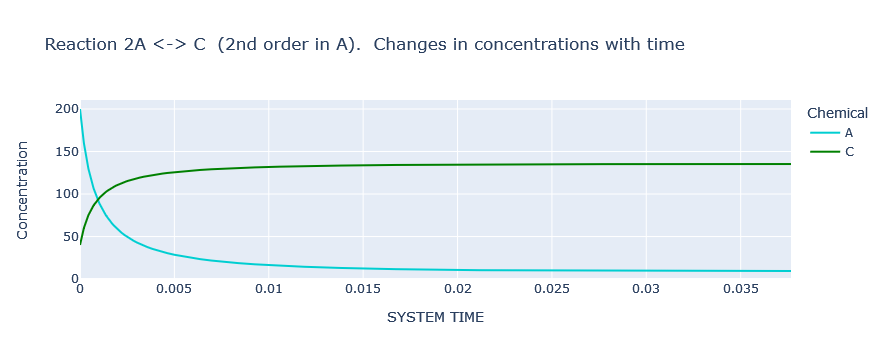

In [12]:
dynamics.plot_history(colors=['darkturquoise', 'green'],
                      title="Reaction 2A <-> C  (2nd order in A).  Changes in concentrations with time")

### Note: "A" (now largely depleted) is the limiting reagent

# PART 2 - Analysis and Validation

#### Let's take a look at time t=0.002, which in our simulation run had proposed as the first step:

In [13]:
# Locate the value closest to the original time step we had requested
dynamics.get_history(t=0.002)

search_value  SYSTEM TIME          A           C caption
80         0.002      0.00204  57.525261  111.237369

### Because of the very large changes happening between t=0 and 0.002, the simulation automatically slowed down and opted to actually take 80 steps in lieu of the 1 step we had (rather optimistically!) proposed  
The number of variable steps actually taken can be modulated by changing the _preset_ passed when the `UniformCompartment` class is first instantiated - or, alternatively, using calls to `use_adaptive_preset()`. For finer control, advanced users may tweak internal parameters such as "norm thresholds" and "step factors"

### Notice how, late in the simulation, the step sizes get BIGGER than the 0.002 we had originally proposed:

In [14]:
dynamics.get_diagnostics().explain_time_advance()

From time 0 to 8.398e-06, in 1 step of 8.4e-06
From time 8.398e-06 to 1.512e-05, in 1 step of 6.72e-06
From time 1.512e-05 to 2.519e-05, in 1 step of 1.01e-05
From time 2.519e-05 to 9.775e-05, in 9 steps of 8.06e-06
From time 9.775e-05 to 0.0001098, in 1 step of 1.21e-05
From time 0.0001098 to 0.0001872, in 8 steps of 9.67e-06
From time 0.0001872 to 0.0002018, in 1 step of 1.45e-05
From time 0.0002018 to 0.000283, in 7 steps of 1.16e-05
From time 0.000283 to 0.0003004, in 1 step of 1.74e-05
From time 0.0003004 to 0.000384, in 6 steps of 1.39e-05
From time 0.000384 to 0.0004049, in 1 step of 2.09e-05
From time 0.0004049 to 0.0005052, in 6 steps of 1.67e-05
From time 0.0005052 to 0.0005303, in 1 step of 2.51e-05
From time 0.0005303 to 0.0006306, in 5 steps of 2.01e-05
From time 0.0006306 to 0.0006607, in 1 step of 3.01e-05
From time 0.0006607 to 0.0007811, in 5 steps of 2.41e-05
From time 0.0007811 to 0.0008172, in 1 step of 3.61e-05
From time 0.0008172 to 0.0009327, in 4 steps of 2.89e-

### One can see how the reaction proceeds in far-smaller steps in the early times, when the concentrations are changing much more rapidly

In [15]:
# Let's look at the first two arrays of concentrations, from the run's history
arr0 = dynamics.get_historical_concentrations(0)   # The initial concentrations
arr1 = dynamics.get_historical_concentrations(1)   # After the first actual simulation step
arr0, arr1

(array([200.,  40.], dtype=float32),
 array([197.98581,  41.0071 ], dtype=float32))

In [16]:
# Let's verify that the reaction's stoichiometry is being respected
dynamics.get_diagnostics().stoichiometry_checker(rxn_index=0, 
                                                 conc_arr_before = arr0, 
                                                 conc_arr_after = arr1)

True

#### Indeed, it can be easy checked that the drop in [A] is twice the increase in [C], as dictated by the stoichiometry.
The diagnostic data, enabled by our earlier call to `set_diagnostics()`, makes it convenient to check

In [17]:
dynamics.get_diagnostics().get_rxn_data(rxn_index=0, head=15)

Reaction:  2 A <-> C


START_TIME  time_step aborted     Delta A    Delta C  \
0     0.000000   0.002000    True         NaN        NaN   
1     0.000000   0.001000    True         NaN        NaN   
2     0.000000   0.000500    True -119.920000  59.960000   
3     0.000000   0.000300    True  -71.952000  35.976000   
4     0.000000   0.000180    True  -43.171200  21.585600   
5     0.000000   0.000108    True  -25.902720  12.951360   
6     0.000000   0.000065    True  -15.541632   7.770816   
7     0.000000   0.000039    True   -9.324979   4.662490   
8     0.000000   0.000023    True   -5.594988   2.797494   
9     0.000000   0.000014    True   -3.356993   1.678496   
10    0.000000   0.000008   False   -2.014196   1.007098   
11    0.000008   0.000007   False   -1.579015   0.789508   
12    0.000015   0.000010   False   -2.330836   1.165418   
13    0.000025   0.000008   False   -1.820604   0.910302   
14    0.000033   0.000008   False   -1.786552   0.893276   

                             caption           rate  
0         aborted: neg. conc. in `A`            NaN  
1         aborted: neg. conc. in `A`            NaN  
2   aborted: excessive norm value(s)  119920.000000  
3   aborted: excessive norm value(s)  119920.000000  
4   aborted: excessive norm value(s)  119920.000000  
5   aborted: excessive norm value(s)  119920.000000  
6   aborted: excessive norm value(s)  119920.000000  
7   aborted: excessive norm value(s)  119920.000000  
8   aborted: excessive norm value(s)  119920.000000  
9   aborted: excessive norm value(s)  119920.000000  
10                                    119920.000000  
11                                    117513.122146  
12                                    115643.287240  
13                                    112910.502954  
14                                    110798.612991

### From the diagnostic data, it can be seen that the first step had several false starts - and the time was automatically repeatedly shrunk - but finally happened.  `Delta A` indeed equals - 2 * `Delta C`, satisfying the stoichiometry

In [18]:
dynamics.get_diagnostics().stoichiometry_checker_entire_run()

True

### Check the final equilibrium

In [19]:
# Verify that the reaction has reached equilibrium
dynamics.is_in_equilibrium()

0: 2 A <-> C
Final concentrations: [A] = 9.467 ; [C] = 135.3
1. Ratio of reactant/product concentrations, adjusted for reaction orders: 1.50933
    Formula used:  [C] / [A]^2 
2. Ratio of forward/reverse reaction rates: 1.5
Discrepancy between the two values: 0.6221 %
Reaction IS in equilibrium (within 1% tolerance)



True

## Display the variable time steps

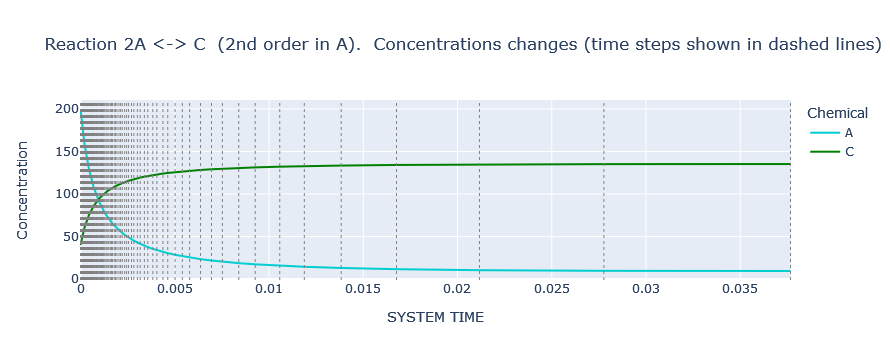

In [20]:
dynamics.plot_history(colors=['darkturquoise', 'green'], show_intervals=True,
                      title="Reaction 2A <-> C  (2nd order in A).  Concentrations changes")

### The intersection of the two lines may be found as follows:

In [21]:
dynamics.curve_intersect('A', 'C', t_start=0, t_end=0.01)

(0.0009423643313311743, 93.33333333333331)

#### For additional diagnostic insight:
`norm_A` and `norm_B` are computed quantities that are used to guide the adaptive time steps

In [22]:
dynamics.get_diagnostics().get_decisions_data()

START_TIME    action  step_factor                  caption  time_step  \
0      0.000000     ABORT          0.5                            0.002000   
1      0.000000     ABORT          0.5                            0.001000   
2      0.000000     ABORT          0.6  excessive norm value(s)   0.000500   
3      0.000000     ABORT          0.6  excessive norm value(s)   0.000300   
4      0.000000     ABORT          0.6  excessive norm value(s)   0.000180   
..          ...       ...          ...                      ...        ...   
115    0.011873  OK (low)          1.5                            0.001956   
116    0.013829  OK (low)          1.5                            0.002934   
117    0.016762  OK (low)          1.5                            0.004401   
118    0.021163  OK (low)          1.5                            0.006601   
119    0.027765  OK (low)          1.5                            0.009902   

        Delta A    Delta C       norm_A    norm_B norm_C norm_D  
0           NaN        NaN          NaN       NaN    NaN    NaN  
1           NaN        NaN          NaN       NaN    NaN    NaN  
2   -119.920000  59.960000  4494.002000       NaN    NaN    NaN  
3    -71.952000  35.976000  1617.840720       NaN    NaN    NaN  
4    -43.171200  21.585600   582.422659       NaN    NaN    NaN  
..          ...        ...          ...       ...    ...    ...  
115   -1.408375   0.704188     0.619850  0.097529    NaN    NaN  
116   -1.423194   0.711597     0.632963  0.109206    NaN    NaN  
117   -1.196267   0.598133     0.447204  0.103047    NaN    NaN  
118   -0.735197   0.367598     0.168911  0.070606    NaN    NaN  
119   -0.210718   0.105359     0.013876  0.021774    NaN    NaN  

[120 rows x 11 columns]